In [109]:
import numpy as np
import pandas as pd
import glob

# importing collected datasets and merging into single dataframe

path = r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\Datasets'''
filenames = list(glob.glob(path + "\*.csv"))
file = filenames[0]

BTC_df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
BTC_df.columns = [BTC_df.columns[0]+"_"+file[-9:-4]]
for file in filenames[1:]:
    load = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    load.columns = [load.columns[0]+"_"+file[-9:-4]]
    BTC_df = pd.merge(BTC_df, load, left_index=True, right_index=True)

print(BTC_df.info())
print(BTC_df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3259 entries, 2017-12-27 to 2009-01-03
Data columns (total 10 columns):
Value_AVBLS    3259 non-null float64
Value_CPTRA    3259 non-null float64
Value_MKPRU    3259 non-null float64
Value_MWNTD    3259 non-null float64
Value_MWNUS    3259 non-null float64
Value_NADDU    3259 non-null float64
Value_NTRAN    3259 non-null float64
Value_NTRAT    3259 non-null float64
Value_NTRBL    3259 non-null float64
Value_TRVOU    3259 non-null float64
dtypes: float64(10)
memory usage: 280.1 KB
None
            Value_AVBLS  Value_CPTRA  Value_MKPRU  Value_MWNTD  Value_MWNUS  \
Date                                                                          
2017-12-27         1.05       161.68     15999.04      45559.0   21272882.0   
2017-12-26         1.05       146.59     14119.02      42867.0   21249422.0   
2017-12-25         1.06       138.78     13949.17      49434.0   21204476.0   
2017-12-24         1.06       139.69     15360.26      40957.0

Data Dictionary:

CSV legend

BCHAIN-AVBLS - average block size

BCHAIN-MKPRU - BTC Market PRice USD

BCHAIN-MWNTD - Number of transactions made by My Wallet Users per day.

BCHAIN-MWNUS - Number of wallets hosts using our My Wallet Service.

BCHAIN-NADDU - Number of unique bitcoin addresses used per day.

BCHAIN-NTRAN - Total number of unique bitcoin transactions per day.

BCHAIN-NTRAT - Total number of unique bitcoin transactions per day (cumulative).

BCHAIN-NTRBL - The average number of transactions per block.

BCHAIN-TRVOU - Data showing the USD trade volume from the top exchanges.

In [110]:
#getting a baseline of statistical descriptors of each series
BTC_df.describe()


,Value_AVBLS,Value_CPTRA,Value_MKPRU,Value_MWNTD,Value_MWNUS,Value_NADDU,Value_NTRAN,Value_NTRAT,Value_NTRBL,Value_TRVOU
count,3259.000000,3259.000000,3259.000000,3259.000000,3.259000e+03,3.259000e+03,3259.000000,3.259000e+03,3259.000000,3.259000e+03
mean,0.290288,11.587814,583.348361,23879.431421,3.135797e+06,1.619941e+05,86324.199448,5.618708e+07,569.288739,4.631122e+07
std,0.339422,16.552431,1728.980041,29718.897203,4.911135e+06,1.973924e+05,100720.218666,7.615171e+07,670.569577,2.386159e+08
min,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000e+00,0.000000,1.000000e+00,1.000000,0.000000e+00
25%,0.005244,2.110517,0.950000,0.000000,2.000000e+00,3.439500e+03,2507.500000,3.775995e+05,15.000000,1.564718e+04
50%,0.138530,6.812223,108.000000,7359.000000,3.193120e+05,5.790400e+04,51666.000000,1.971206e+07,304.000000,1.506129e+06
75%,0.521351,11.489526,470.360000,48088.000000,4.225244e+06,2.616740e+05,133722.000000,8.333256e+07,918.500000,1.499627e+07
max,1.070000,161.680000,19498.680000,122796.000000,2.127288e+07,1.072861e+06,490644.000000,2.862143e+08,2722.620000,5.352016e+09


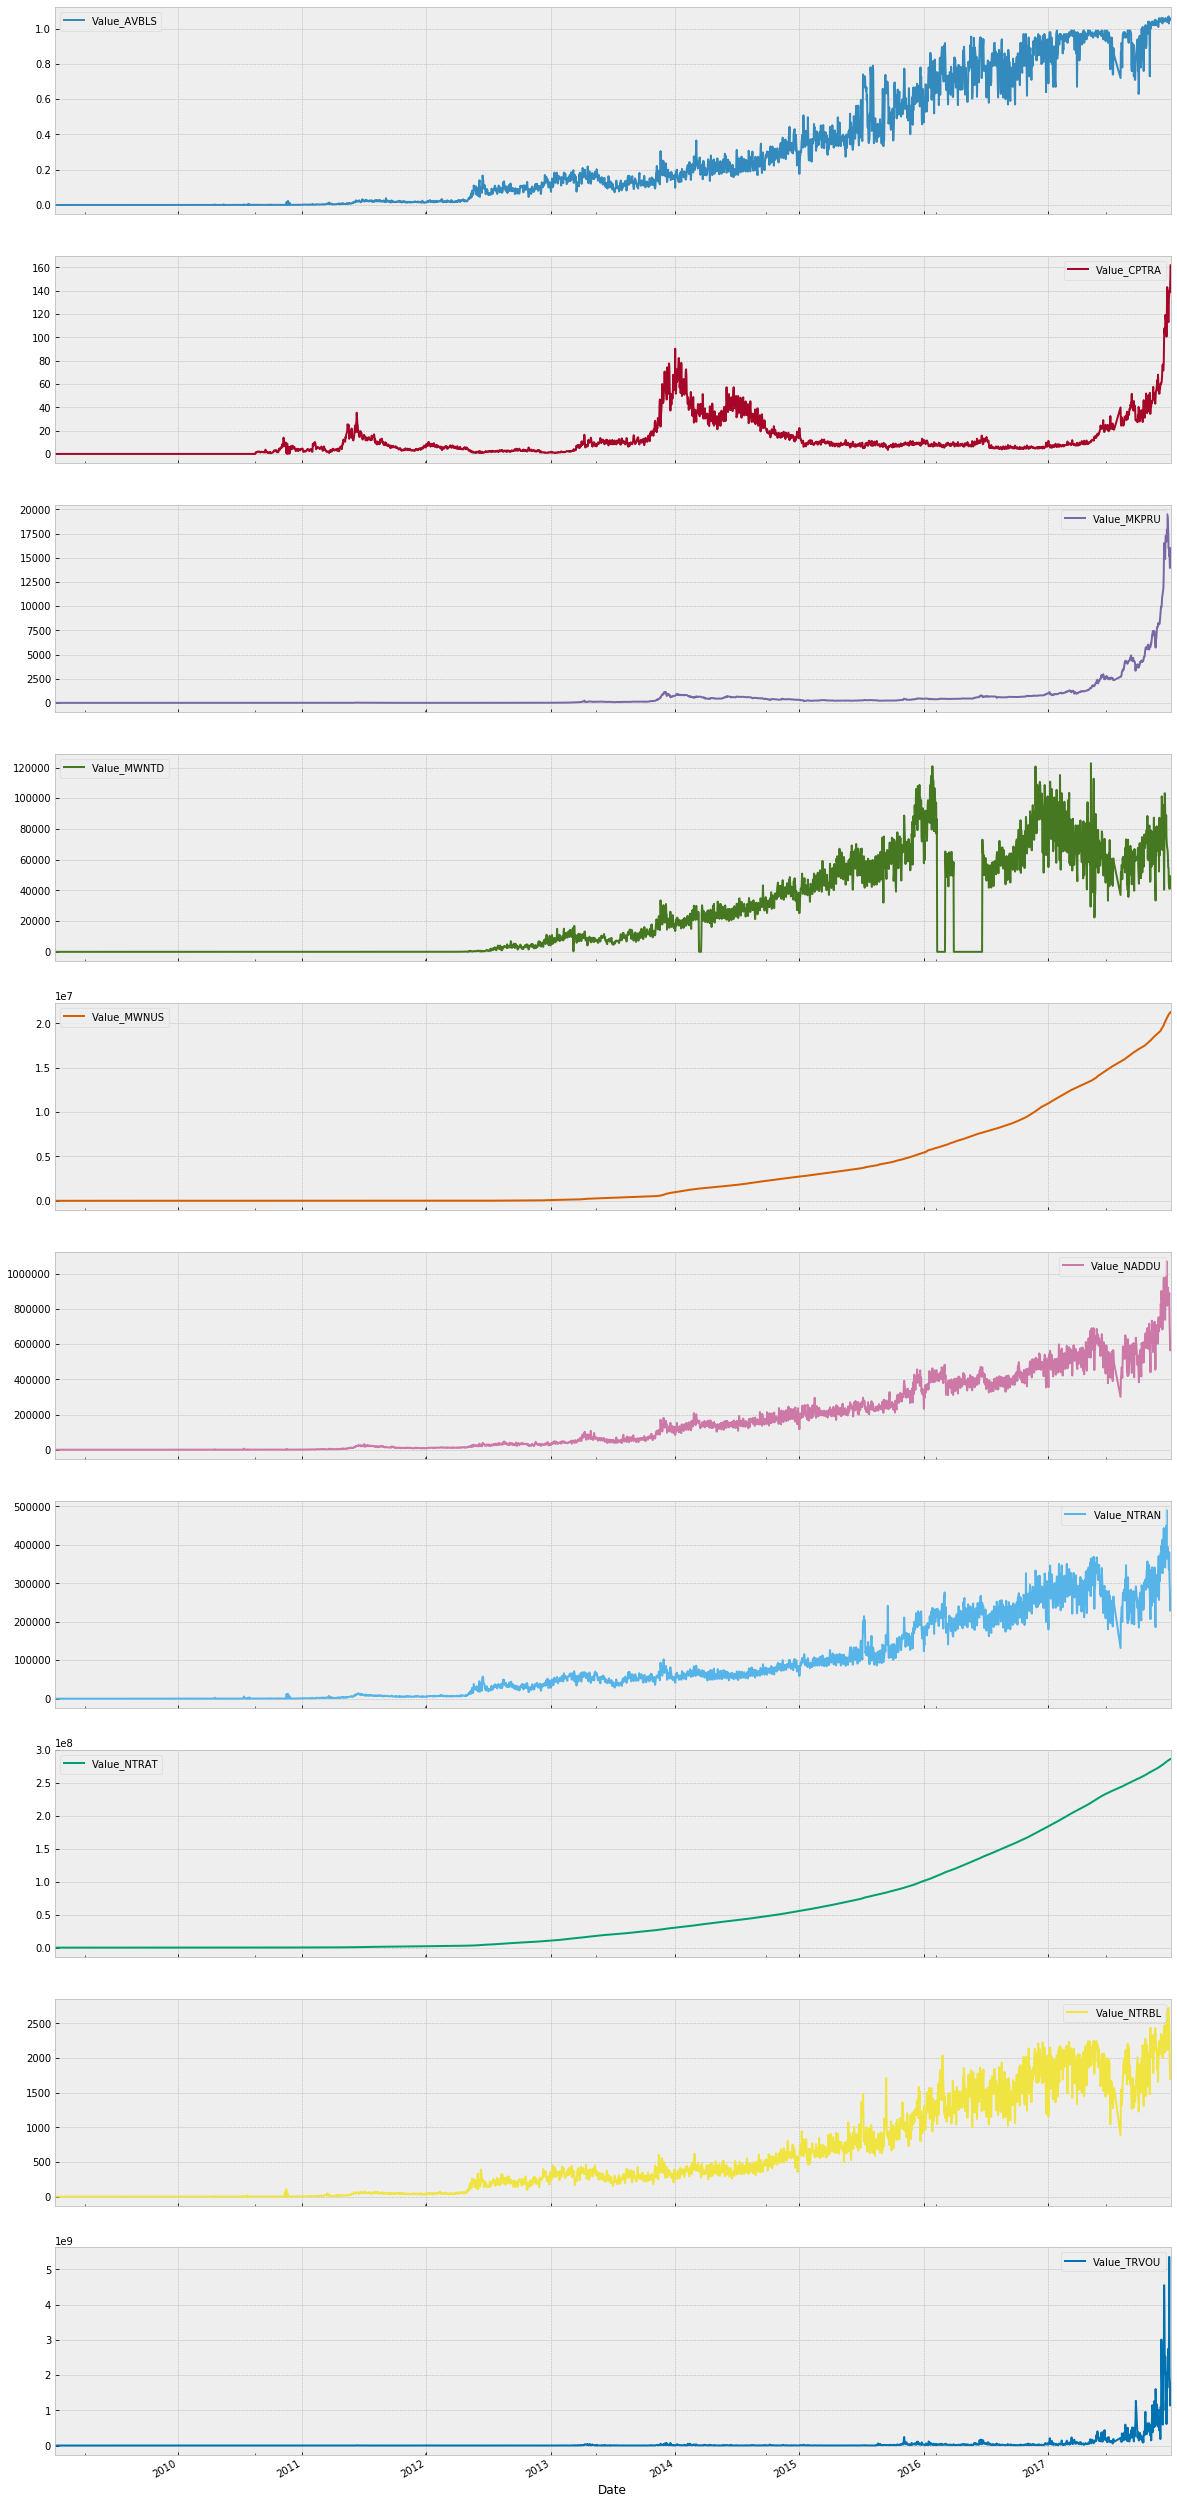

In [111]:
#plotting the compiled dataframe for visual inspection and interpretation
#importing data viz library

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

BTC_df.plot(subplots=True, figsize=(20,50))
plt.show()


#### Initial Takeaways

*With few exceptions, most data begins to see accelerated grwoth in 2012 (almost a cambrian moment in BTC's history).  
*2017 was a year of increased volatility.  However, the majority of the BTC Market Price growth occured in the latter half of the year.
*We have "0" values in the "Number of wallets using the My Wallet Services (daily)". This may be due to bad data or service outages.  Further investigation may be warranted if I choose to further analyze.

### Exploration 1) Historical Trend of Average Number of Bitcoin per Transaction

My objective with this exploration is determine: if Bitcoin is increasingly being adopted as currency/means of exchange, if Bitcoin is increasingly becoming a "storage of value" or speculative investment, and if we have already reached "peak Bitcoin".

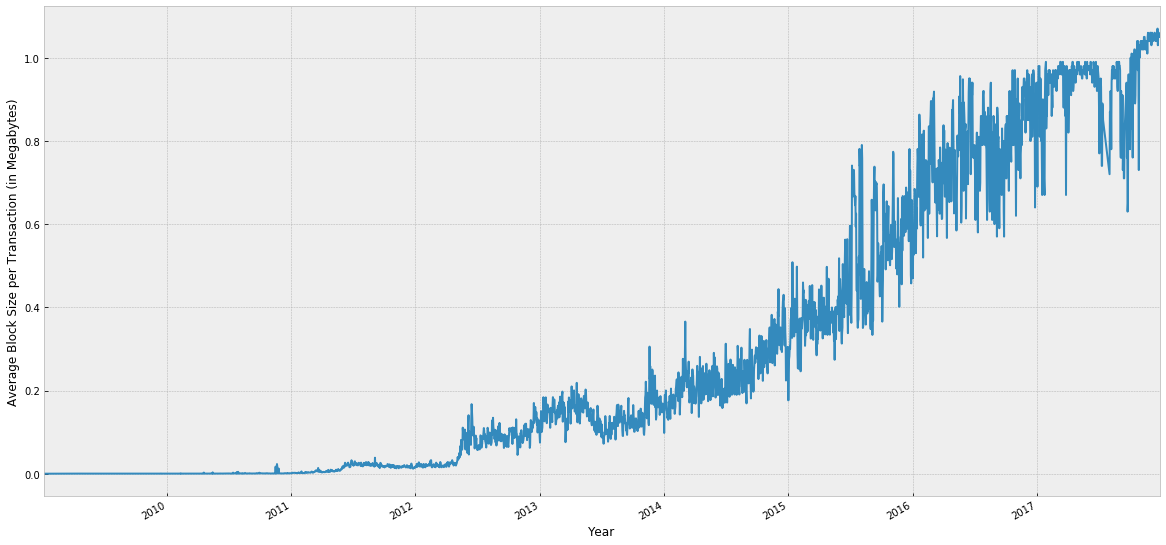

In [112]:
# further analysis of Average Size of the Blocks added to the chain, a good proxy of BTC transactions. 

plt.rcParams['figure.figsize'] = (20,10)
BTC_df['Value_AVBLS'].plot()
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()
#AVG Block Size is 0.28, system is maxed at 1MB - not significant in analysis as this measure refers to the data size of the block sent to the chain
#Another musing worth exploring... if block size has been at max for a substantial amount of time.  This either means the market
#is highly liquid and has enough market participants (or indicating that the general public is now present in market)

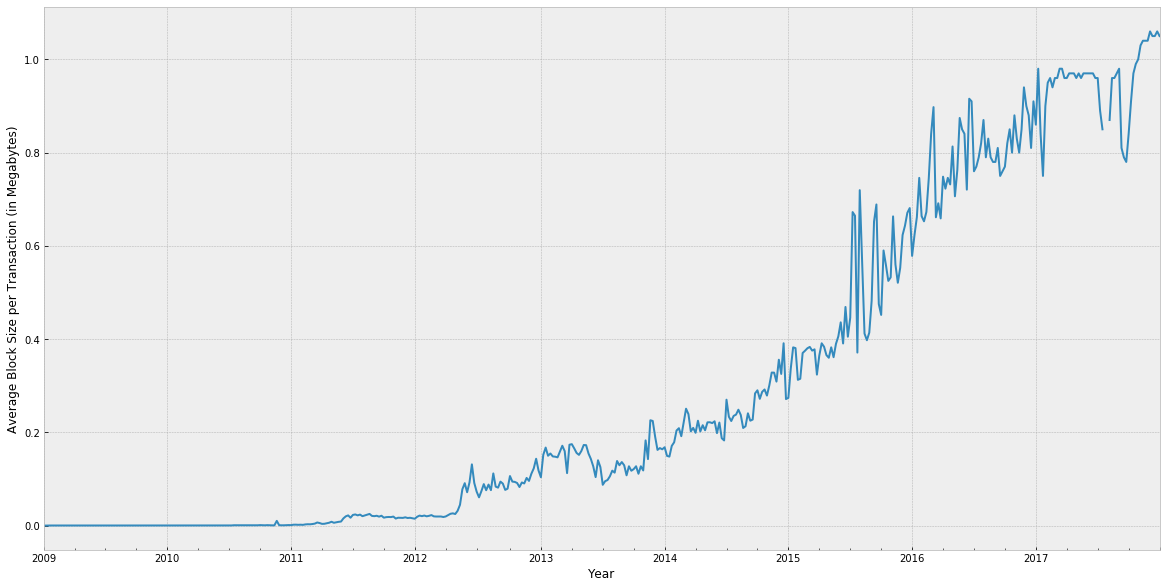

In [113]:
# resample on weekly basis to clean up the plot

BTC_df['Value_AVBLS'].resample('W').median().plot()
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()

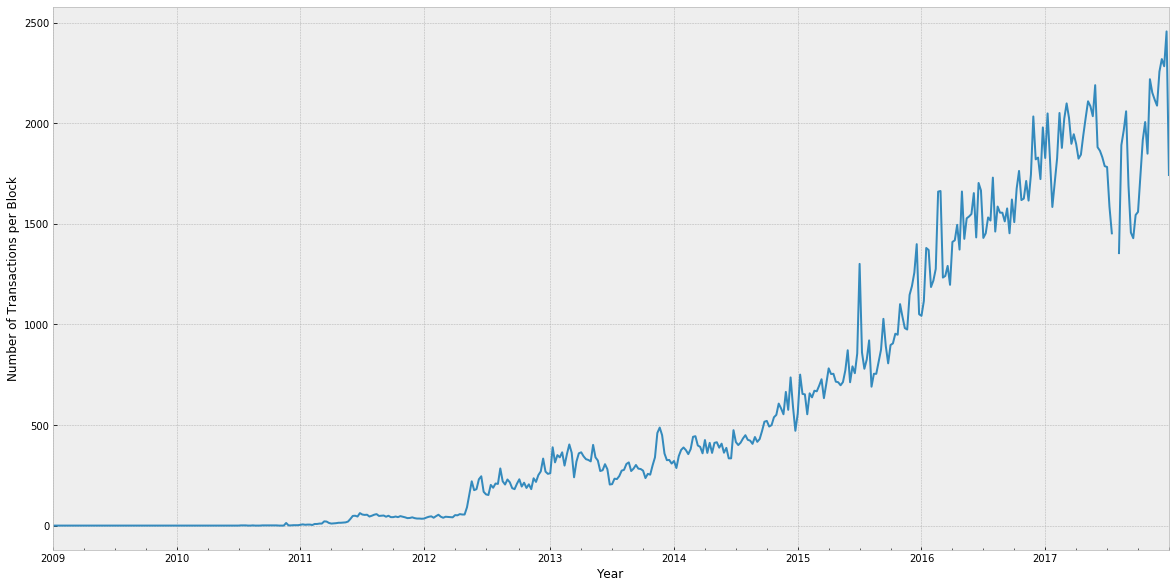

In [114]:
# examining the Number of Transactions per block added to the chain to further drive the above point home

BTC_df['Value_NTRBL'].resample('W').median().plot()
plt.xlabel('Year')
plt.ylabel('Number of Transactions per Block')
plt.show()


Though the number of transactions in each block (added to the chain) is trending higher since 2011,
we see a bit of a drop off in mid-2017, this may be explain by the meteoric rise in the price of BTC.
That is, few transactions are needed to move an equivalent amount of value.  (Will need to plot against BTC price to  see this relationship)

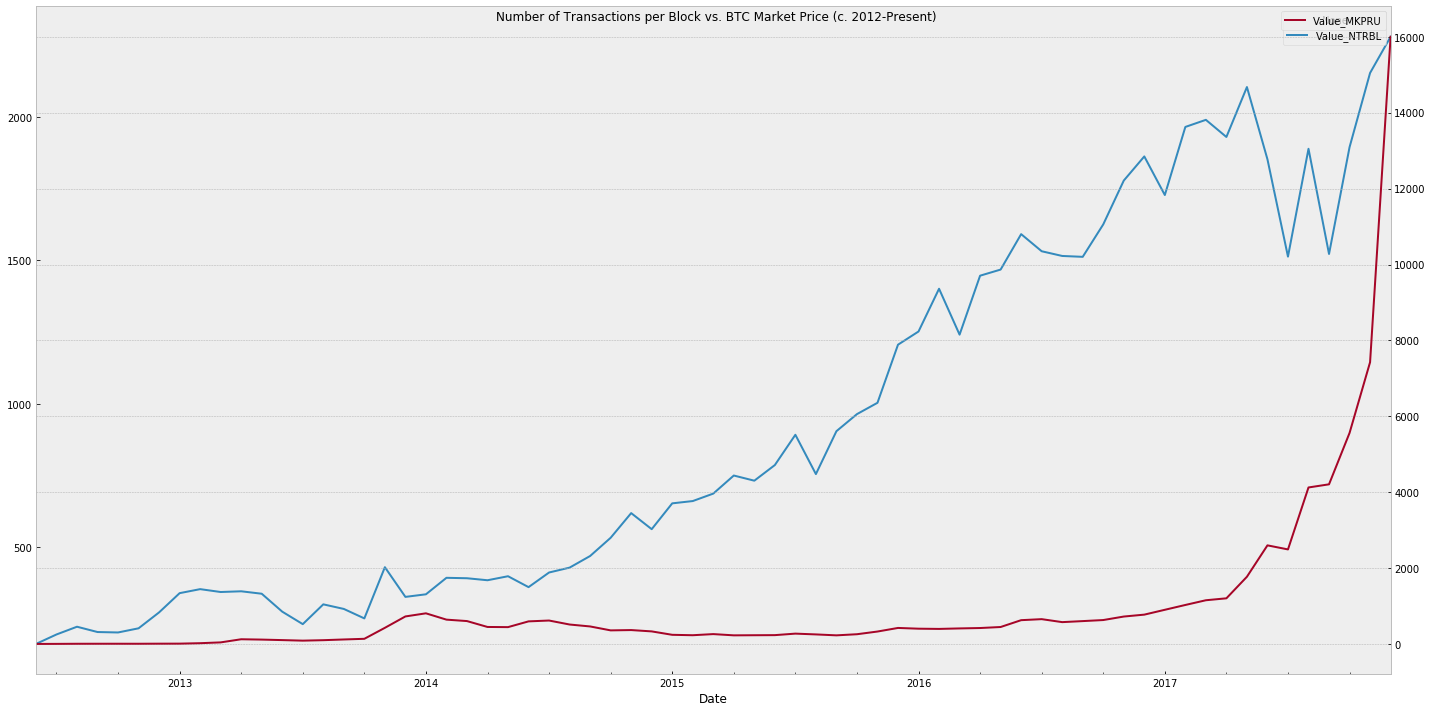

In [115]:
# looking at a comparison of Number of Transactions per block and the coin's market price (post-2012 
# and resampled on a MONTHLY basis)

_ = BTC_df['Value_NTRBL'].iloc[:2000].resample('M').median().plot()
_ = plt.legend()
_ = BTC_df['Value_MKPRU'].iloc[:2000].resample('M').median().plot(secondary_y=True)
_ = plt.suptitle('Number of Transactions per Block vs. BTC Market Price (c. 2012-Present)')
_ = plt.tight_layout()
_ = plt.legend()
plt.show()

If we are seeking evidence that Bitcoin is increasingly being adopted as a currency, I expected to see a negative correlation between BTC market price and transactions per block (in other words, as the price of BTC increases, fewer transactions are needed).  However, we see that the number of transactions does reach an inflection point around Q1 2017 as the price of BTC doubles and triples from pre-2017 prices.  

Then something interesting happens, it seems the rising market price of BTC attracts more participants (and thus more transactions) into the market. 

Let's see if we can reinforce this notion with determining the number of BTC per transaction...

In [116]:
# loading in additional data to calculate number of BTC per transaction over time

new_BTC_txn = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\estimated-transaction-volume-usd(1).csv''',
                         header=None, parse_dates=True, index_col=[0]).dropna()
daily_price = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\market-price.csv''',
                         header=None, parse_dates=True, index_col=[0]).dropna()

new_BTC_txn.columns = ['txn_vol_usd']
daily_price.columns = ['daily_close_price']
print(new_BTC_txn.head())
print(daily_price.head())

            txn_vol_usd
0                      
2009-01-03          0.0
2009-01-05          0.0
2009-01-07          0.0
2009-01-09          0.0
2009-01-11          0.0
            daily_close_price
0                            
2009-01-03                0.0
2009-01-05                0.0
2009-01-07                0.0
2009-01-09                0.0
2009-01-11                0.0


In [117]:
# combining existing series from original dataframe with new data
new_BTC_txn = pd.merge(new_BTC_txn, pd.DataFrame(BTC_df['Value_NTRAN']),left_index=True, right_index=True)
new_BTC_txn = pd.merge(new_BTC_txn, daily_price, left_index=True, right_index=True)

In [118]:
# creating new column for # of BTC per transactino (As Transaction Volumn divded by # of Transactions)
new_BTC_txn['BTC_per_txn'] = (new_BTC_txn.txn_vol_usd/new_BTC_txn.daily_close_price)/new_BTC_txn.Value_NTRAN
new_BTC_txn = new_BTC_txn.dropna()
new_BTX_txn = new_BTC_txn.sort_index(axis=0, ascending=False, inplace=True)
new_BTC_txn.head()

,txn_vol_usd,Value_NTRAN,daily_close_price,BTC_per_txn
2017-12-27,4.694566e+09,247440.0,15589.321667,1.217022
2017-12-25,2.519602e+09,279523.0,14119.028333,0.638425
2017-12-23,2.465336e+09,380648.0,15360.261667,0.421652
2017-12-21,3.660302e+09,370277.0,16047.510000,0.616003
2017-12-19,3.771404e+09,394239.0,17737.111667,0.539337


In [119]:
new_BTC_txn.shape

(1334, 4)

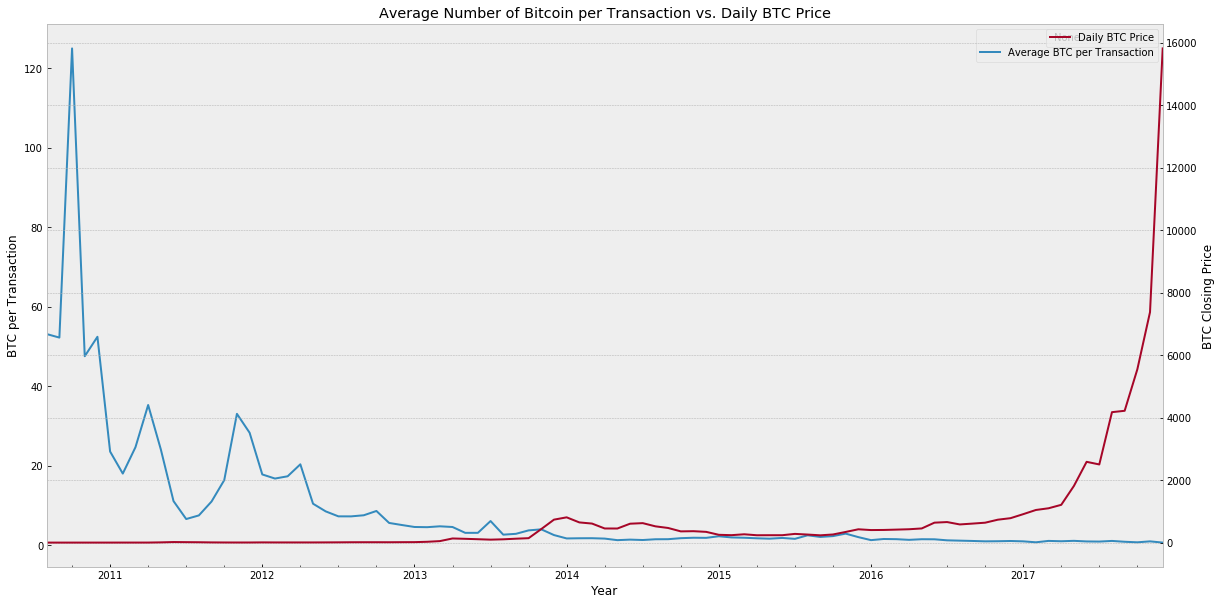

In [120]:
# plotting BTC per Transaction and BTC Prices, both series resampled on a Monthly basis for cleaner plot
resample1 = new_BTC_txn.BTC_per_txn.resample('M').median()
resample1.plot()
plt.ylabel('BTC per Transaction')
plt.xlabel('Year')
plt.legend(['Average BTC per Transaction'])

resample2 =new_BTC_txn.daily_close_price.resample('M').median()
resample2.plot(secondary_y=True)

plt.title('Average Number of Bitcoin per Transaction vs. Daily BTC Price')
plt.ylabel('BTC Closing Price')
plt.legend(['Daily BTC Price'])

plt.show()

The above plot suggests that the number of Bitcoin per transaction has decreased over time and, at times, in relation to increasing Bitcoin prices.  This relationship makes intuitive sense... as the price of Bitcoin increases, it takes a fewer amount of Bitcoin to transact the same equivalent dollar amount. 

#### Exploration 1) Conclusions:

Summary of findings:
1) The average size in MBs of each block added to the chain has been increasing over time with the average size hitting the upper 1.0 MB limit.  Though limited in scope, we can infer from this that the number of transactions and users is growing rapidly and contributing to the large block sizes.  That is, each block is increasingly containing more data as the volume of recorded transactions increases.

2) The increasing volume of transactions is further supported by the trend of increasing number of daily transactions.  Interestingly, the trend of increasing daily transaction volume has mostly been unaffected by the increasing price of Bitcoin.  That is, the market is transacting more as prices increase.  

3) The average amount of Bitcoin per transaction has declined since 2010 and stayed in sub-10 BTC territory beginning in late-2012 with the price of BTC likely being a factor.  

Our first exploration also helps to answer the initial questions of a)Has the trading dynamics of Bitcoin (and other recent alternatives such as Etherum) changed and in what ways? and b) Is there evidence that Bitcoin is increasingly becoming a medium of exchange or trade?

*As the price of BTC increases, the number of transactions has been increasing.  This suggests participants are entering the market to transact BTC as a "storage of value"  (similar to a commodity such as gold) as opposed to growing adoption of BTC as a means of exchange.  If the "means of exchange" notion held true, I believe the number of BTC per transaction would have declined starting around 2016-2017, much later than we actually observed in the data. 



#### Exploration 2) Are there any factors in the characteristics of Bitcoin to support its current valuation or is there mounting evidence of a bubble?

Here I would like to explore the dataset as a whole to see if there are any inferences we can make on this front and we can uncover additional evidence of how the trading/market dynamics of Bitcoin has changed (and in what ways). 

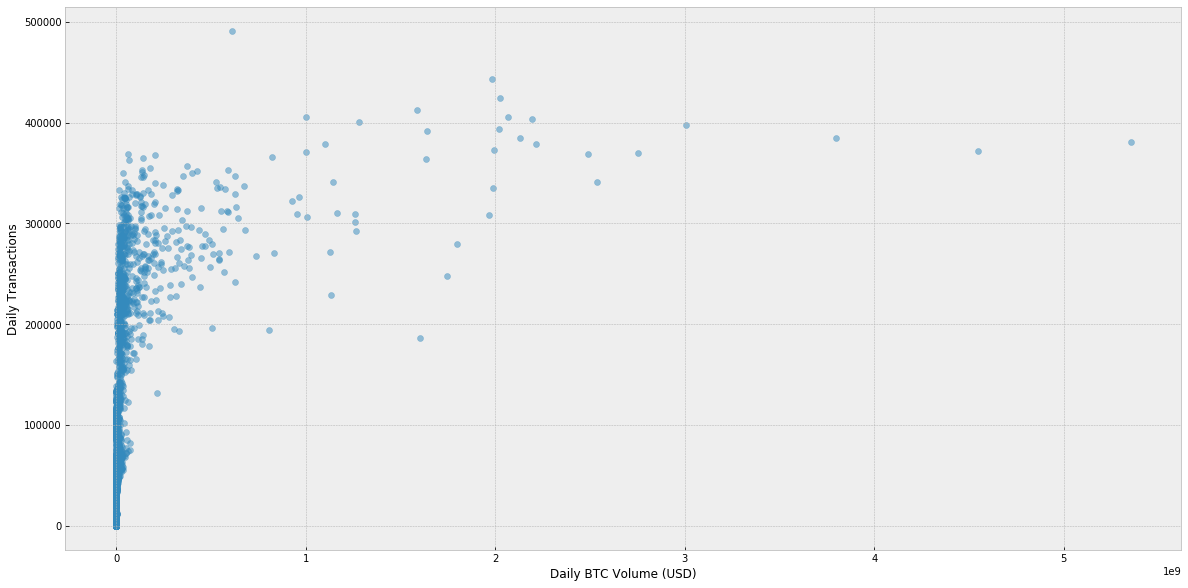

In [121]:
# some scatter plots to see any potential relationships between the series'
# this plot intended to look for a relationship between total transaction volume and number of transactions
plt.scatter(x=BTC_df['Value_TRVOU'], y=BTC_df['Value_NTRAN'], alpha=0.5)
plt.xlabel('Daily BTC Volume (USD)')
plt.ylabel('Daily Transactions')
plt.show()

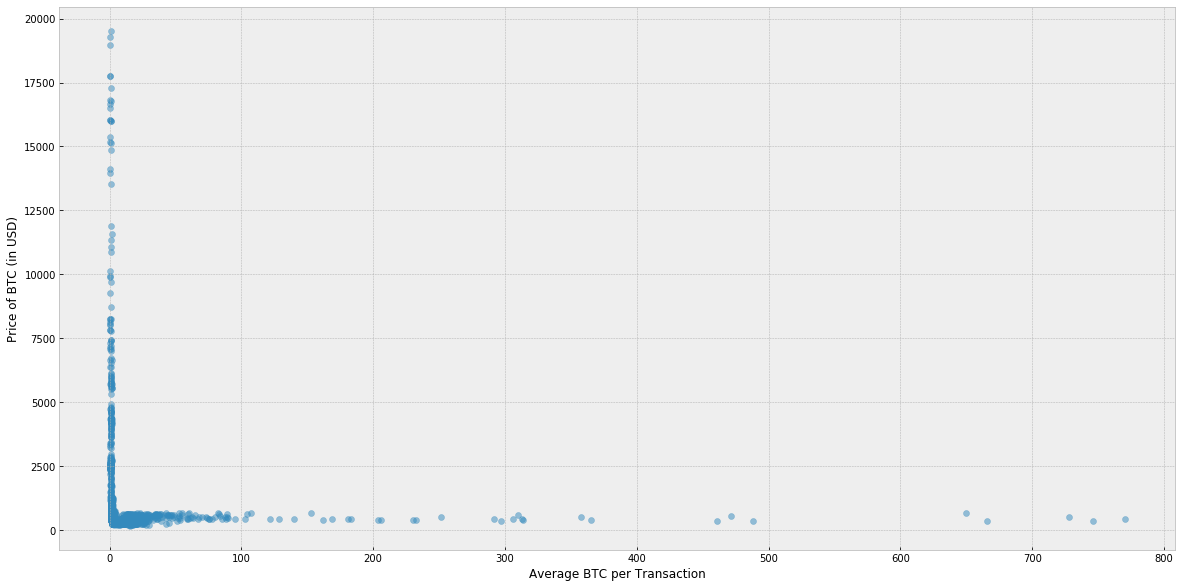

In [122]:
plt.scatter(x=new_BTC_txn.BTC_per_txn, y=BTC_df['Value_MKPRU'][:1334], alpha=0.5)
plt.xlabel('Average BTC per Transaction')
plt.ylabel('Price of BTC (in USD)')
plt.show()

This plot further reinforces an above time-series chart where we see that:

*Average BTC quantity per transaction was higher when the price of BTC was much lower.  We do not observe any instances of spikes in average BTC quantity with higher BTC prices. 

*We see a concentration of transactions occuring in the sub-100 BTC range.  

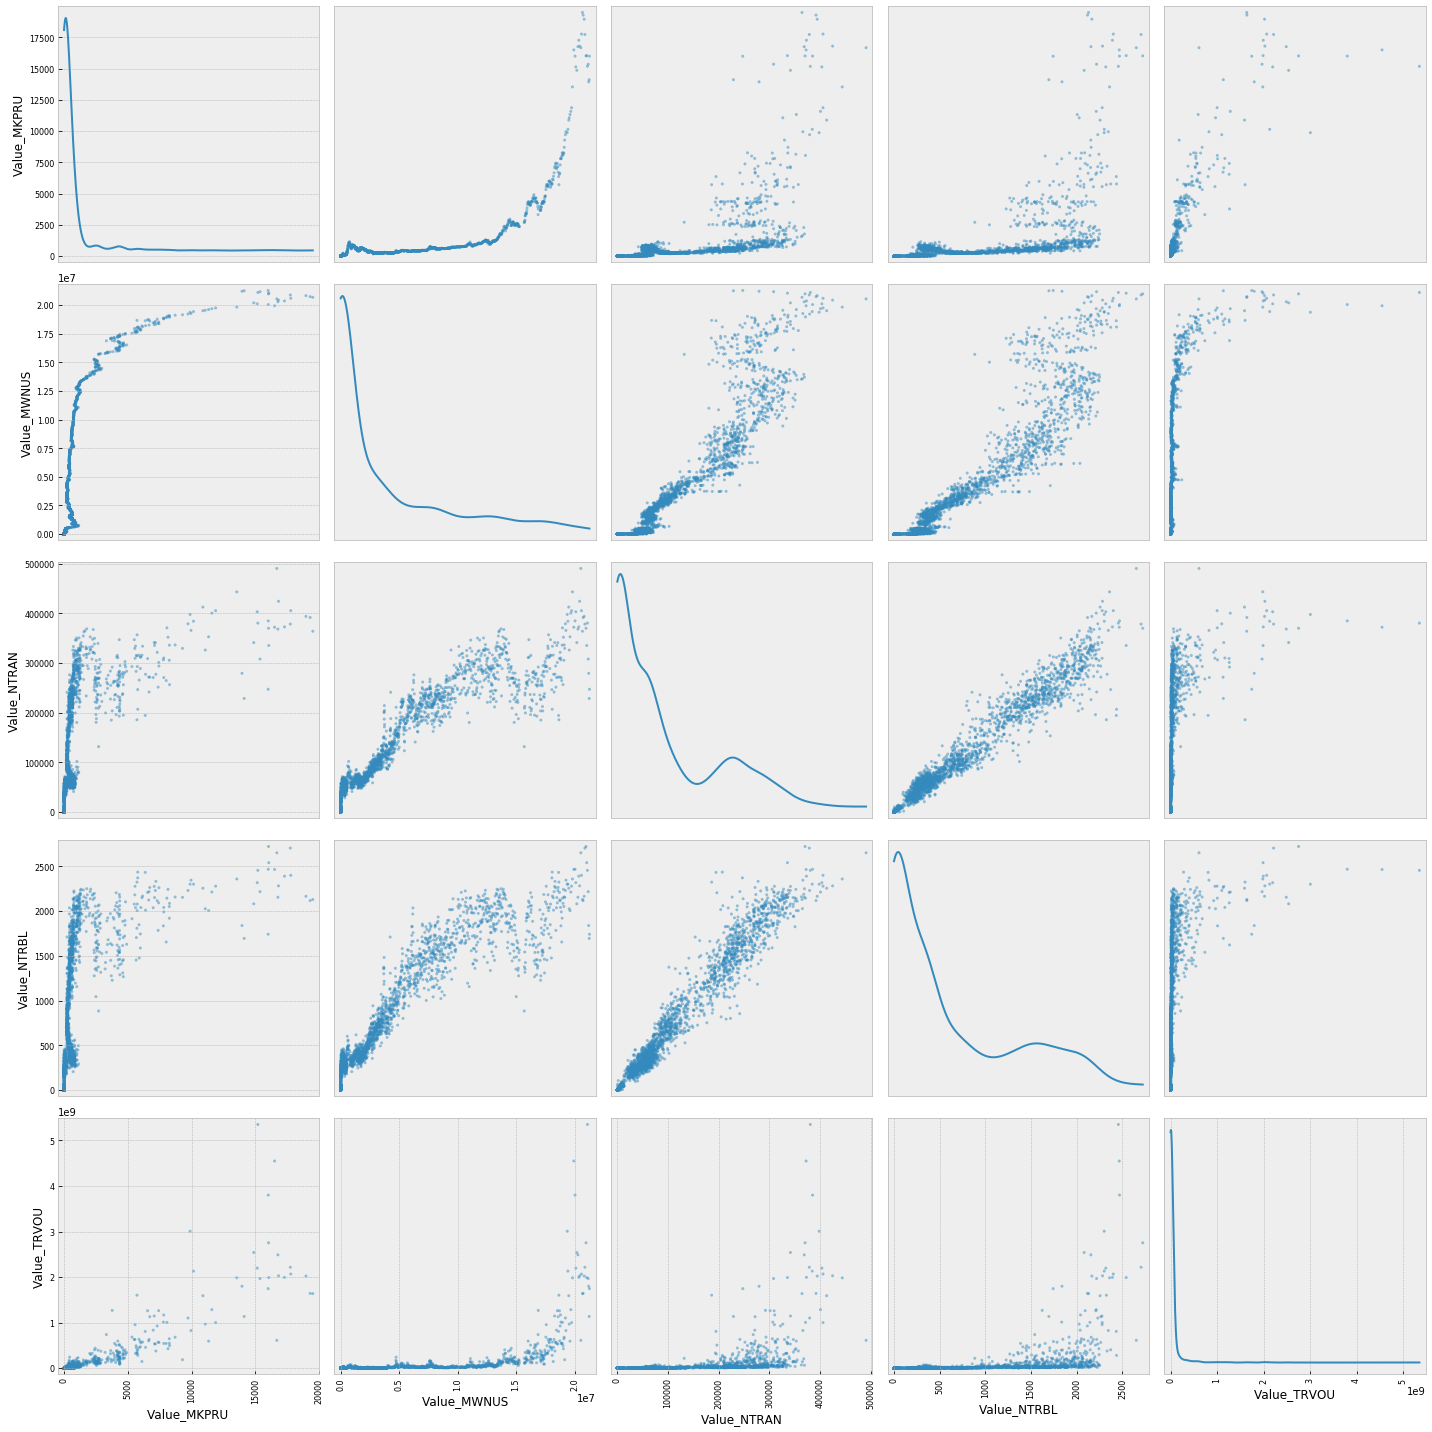

In [123]:
#scatter plotting all series of original dataframe to see if there are any interesting relationships
pd.plotting.scatter_matrix(BTC_df[['Value_MKPRU','Value_MWNUS','Value_NTRAN','Value_NTRBL','Value_TRVOU']], diagonal="kde",
                            figsize=(20,20), alpha=0.5)
plt.tight_layout()
plt.show()

Notable findings:

The growth of users/wallets was exponential as the price of BTC surpassed $2,500 USD. We see some variability at higher BTC prices and possibly due to users exiting their BTC positions or migrating to other coins. 


Key Takeaways:

The only other obvious correlation is an intuitive relationship between the Number of Transactions and the Number of users.  Naturally, growing user base will also grow the number of transactions.  A linear relationship is unsurprising here. 

Otherwise, does not appear to be any other correlations within the dataset and price of BTC.


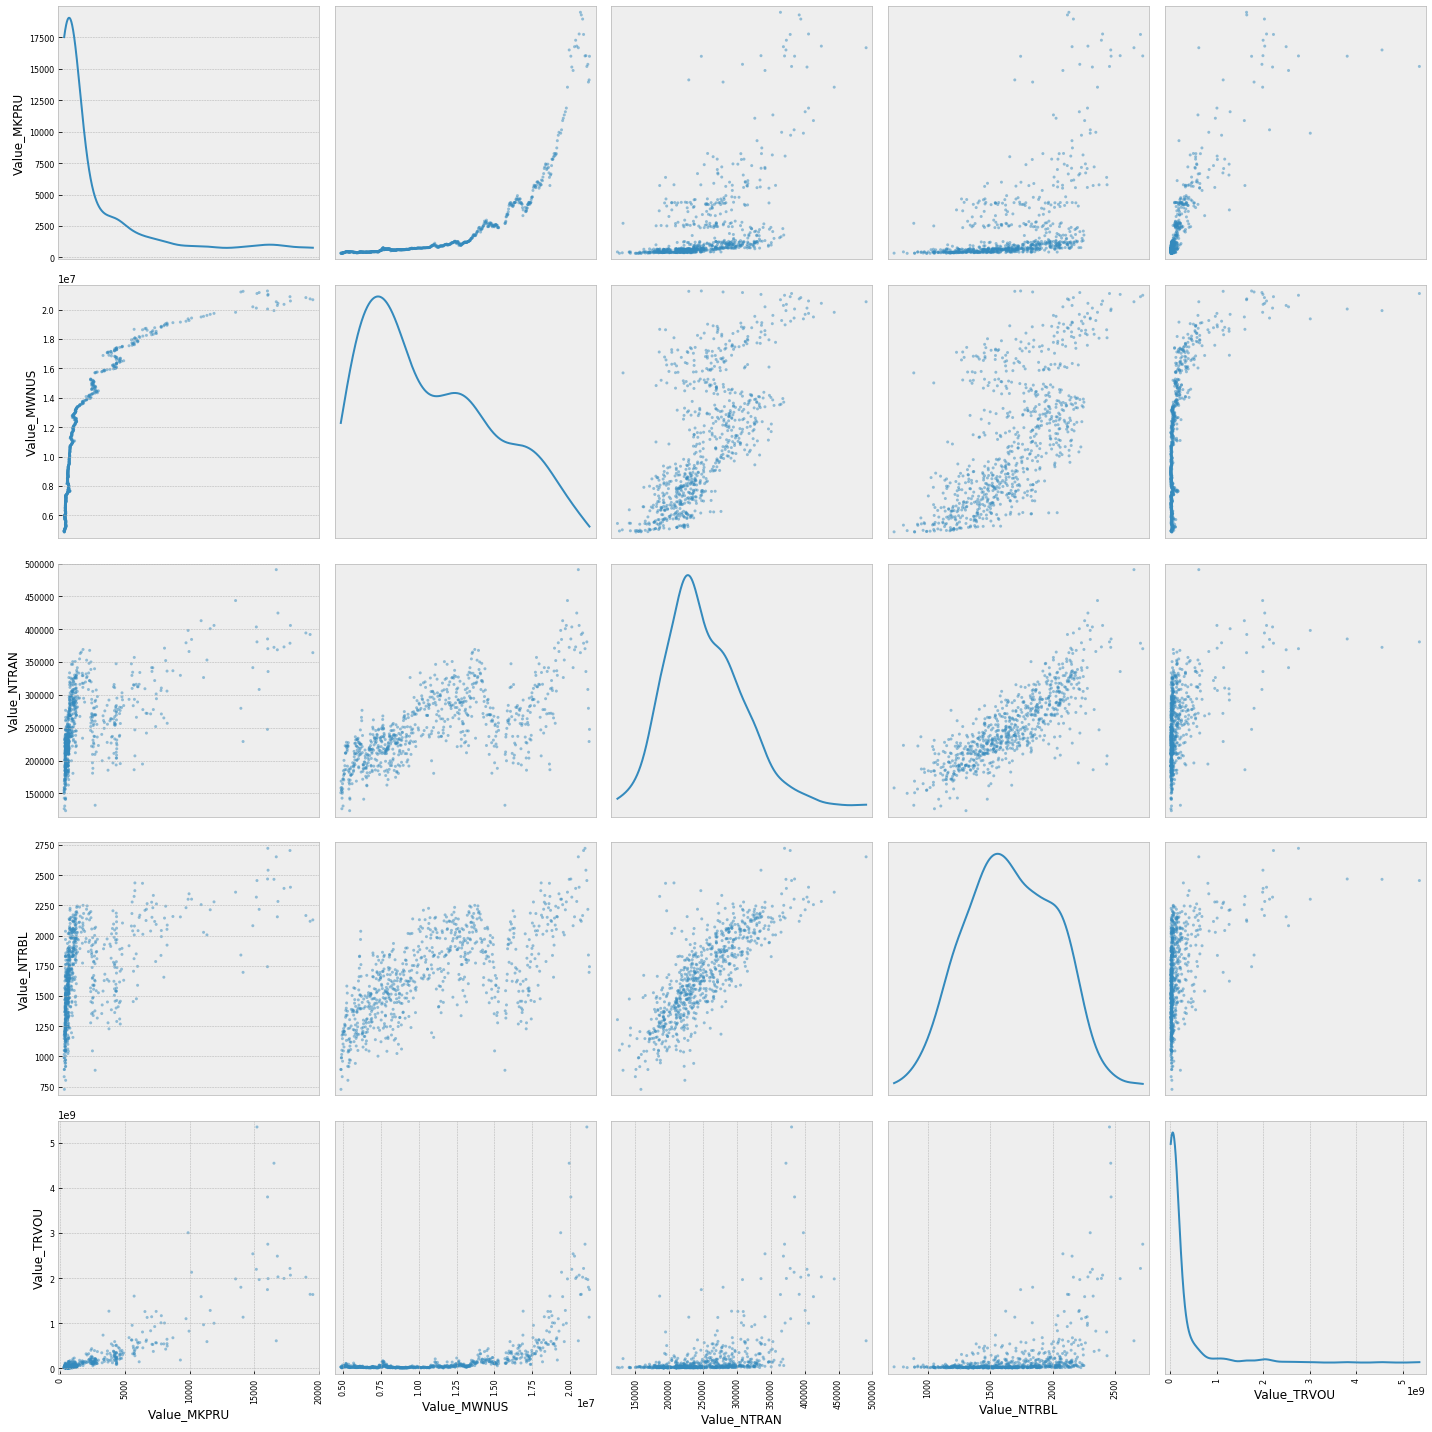

In [124]:
#zooming in on 2016 to present
pd.plotting.scatter_matrix(BTC_df[['Value_MKPRU','Value_MWNUS','Value_NTRAN','Value_NTRBL','Value_TRVOU']][:750], diagonal="kde",
                            figsize=(20,20), alpha=0.5)
plt.tight_layout()
plt.show()

Visualizing data only from 2016-present does only reinforces a lack of any relationship in the data.

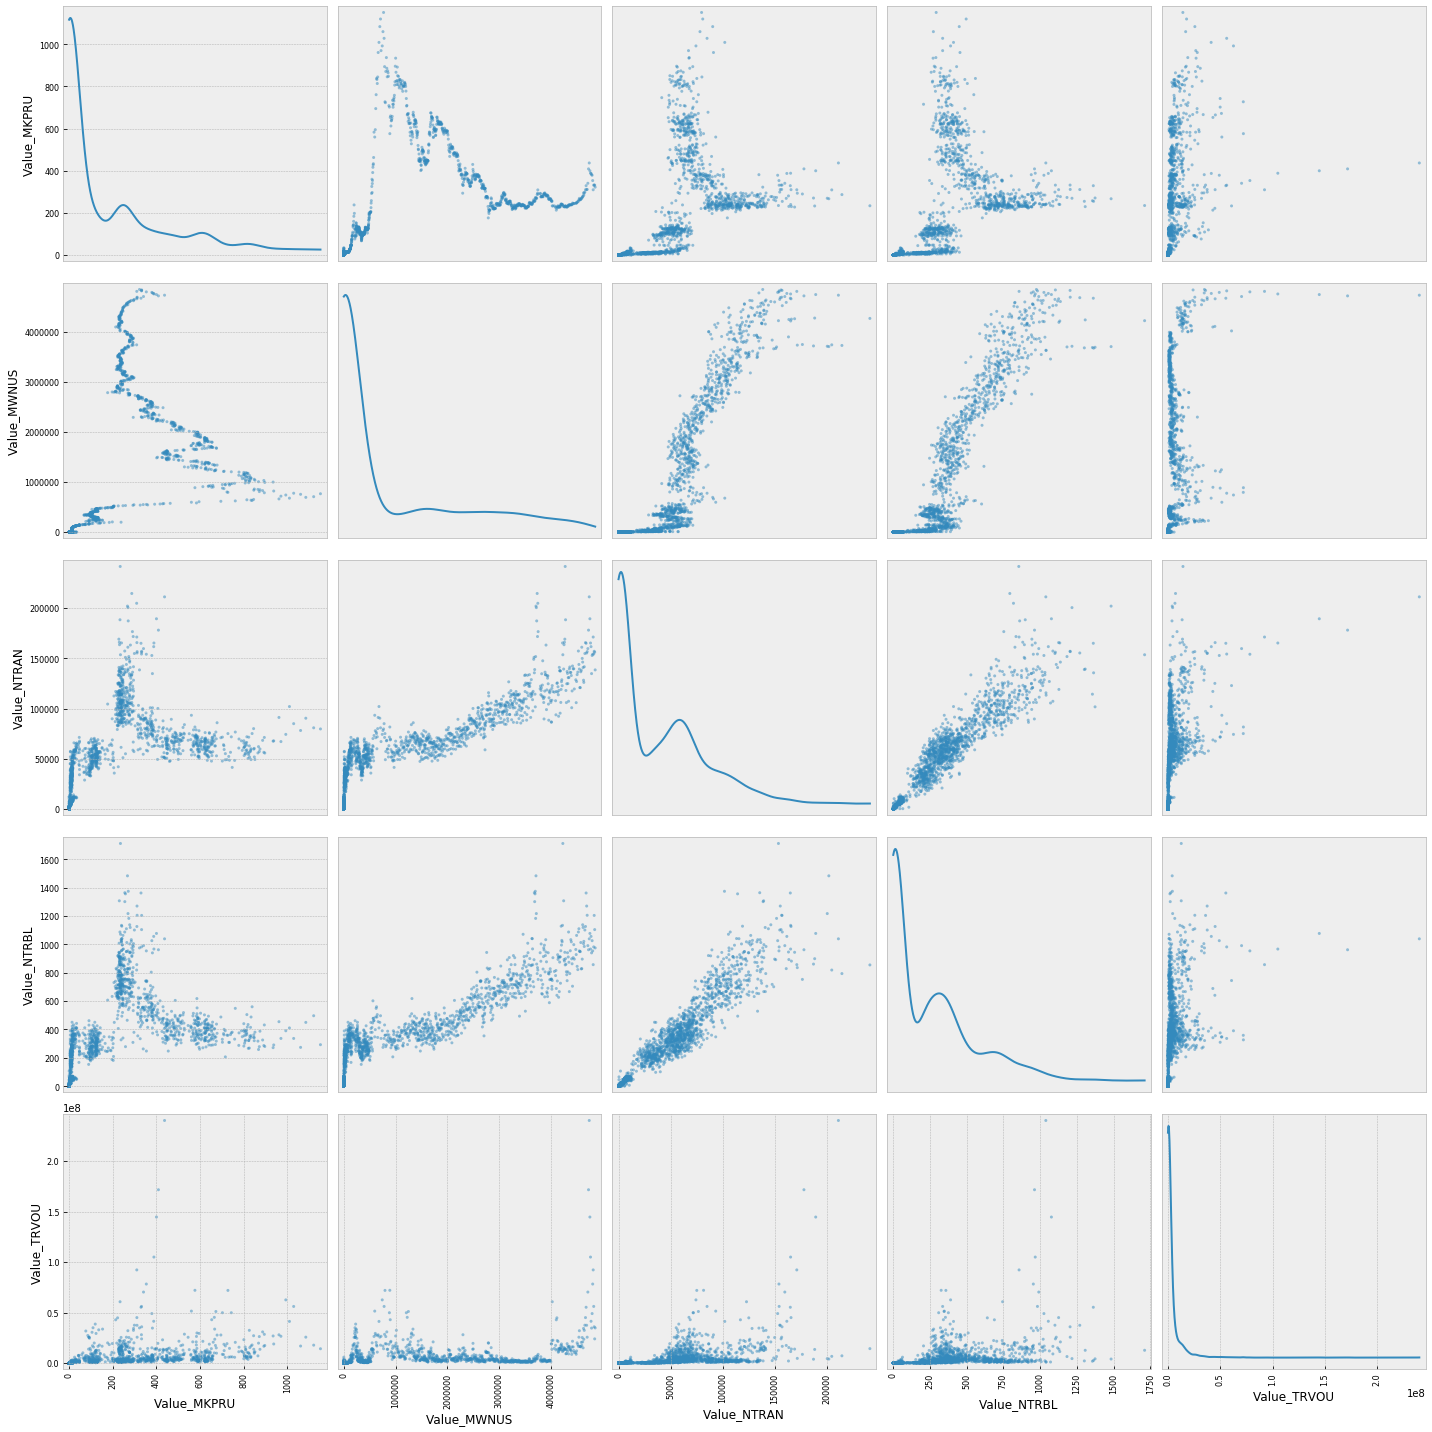

In [125]:
#zooming in on pre-2016
pd.plotting.scatter_matrix(BTC_df[['Value_MKPRU','Value_MWNUS','Value_NTRAN','Value_NTRBL','Value_TRVOU']][750:], diagonal="kde",
                            figsize=(20,20), alpha=0.5)
plt.tight_layout()
plt.show()

Exploration 2) Analysis:

This exploration helps us understand that there is little evidence that Bitcoin's market environment is a direct factor in the overall dynamic of Bitcoin's price.  But rather this leads to believe that Bitcoin's pricing is likely driven by market forces as opposed to any increasing utility of Bitcoin as a currency.  

Exploration 3) Is there evidence of any relationship or correlation between Bitcoin's performance and other cryptocurrencies?

[Continued in 2nd notebook...]

In [126]:
# combined initial BTC_df frame with the BTC_per_txn

combined = pd.merge(BTC_df, new_BTC_txn[['txn_vol_usd','daily_close_price','BTC_per_txn']],
                    left_index=True, right_index=True)

# dropping the Value_MWNTD ince there are 0 vals and we have a cumulative measure with Value_MWNUS 
combined = combined.drop(['Value_MWNTD','txn_vol_usd','daily_close_price'] , axis=1)

combined.head()

,Value_AVBLS,Value_CPTRA,Value_MKPRU,Value_MWNUS,Value_NADDU,Value_NTRAN,Value_NTRAT,Value_NTRBL,Value_TRVOU,BTC_per_txn
2017-12-27,1.05,161.68,15999.04,21272882.0,605853.0,247440.0,286214316.0,1742.53,1.745062e+09,1.217022
2017-12-25,1.06,138.78,13949.17,21204476.0,652209.0,279523.0,285737950.0,1838.96,1.798168e+09,0.638425
2017-12-23,1.06,137.02,15190.94,21100453.0,890731.0,380648.0,285150216.0,2455.79,5.352016e+09,0.421652
2017-12-21,1.07,113.03,16026.27,20979889.0,853863.0,370277.0,284434086.0,2722.62,2.752776e+09,0.616003
2017-12-19,1.04,137.66,18961.85,20822024.0,922523.0,394239.0,283685187.0,2166.14,2.021141e+09,0.539337


In [127]:
# importing clustering from scikit learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


state = 16

In [128]:
# testing which value of K to use for working model

SS = []
K_range = range(2,11)
x_scaled = scaler.fit_transform(combined)


for i in K_range:
    km = KMeans(n_clusters=i, random_state=state)
    km.fit(x_scaled)
    SS.append(km.inertia_)

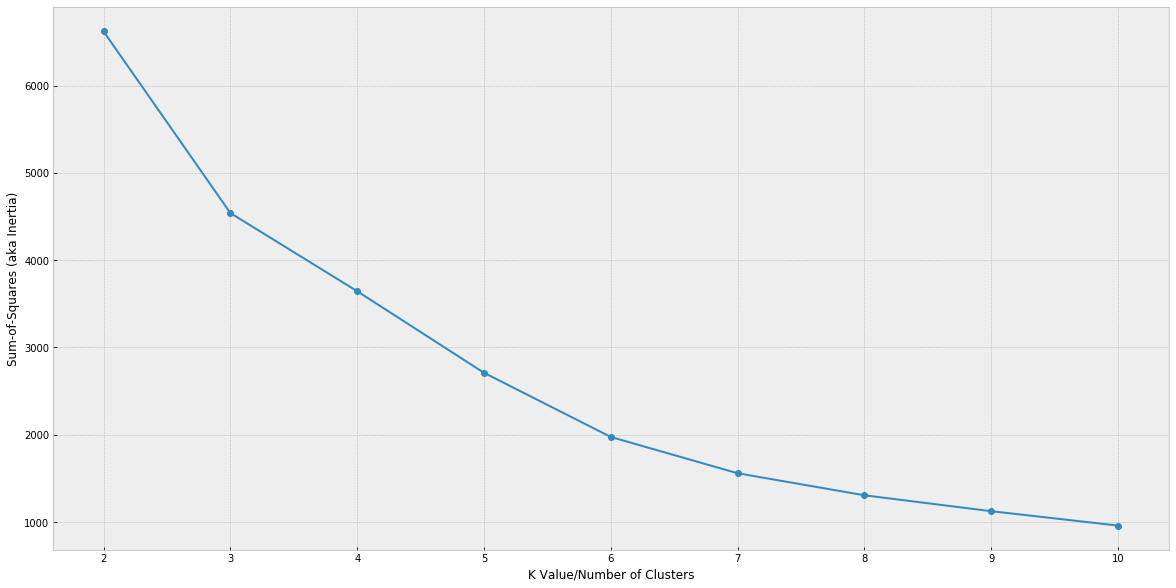

In [129]:
# constructing plot showing SS (aka "inertia") for K values

plt.plot(K_range, SS, '-o')
plt.xlabel('K Value/Number of Clusters')
plt.ylabel('Sum-of-Squares (aka Inertia)')
plt.xticks(K_range)

plt.show()

Per elbow-method, using a K value of 6

In [130]:
# working model

km = KMeans(n_clusters=6, random_state=state)
km.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=16, tol=0.0001, verbose=0)

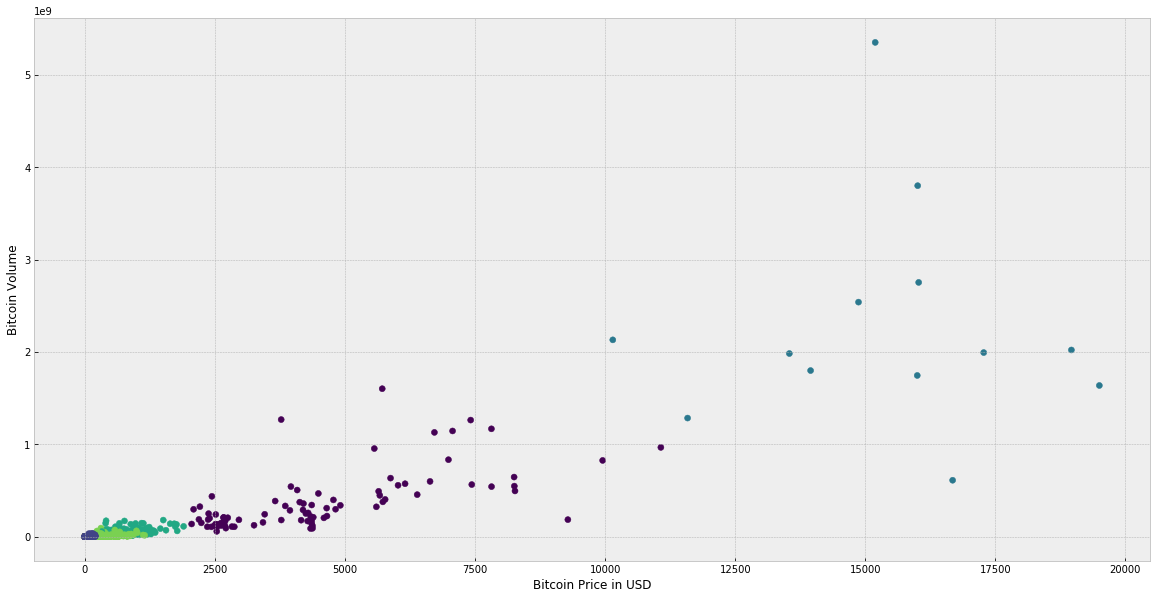

In [131]:
# let's see if this clustering makes sense visually

labels = km.labels_

plt.scatter(combined['Value_MKPRU'], combined['Value_TRVOU'], c=labels)
plt.xlabel('Bitcoin Price in USD')
plt.ylabel('Bitcoin Volume')
plt.show()

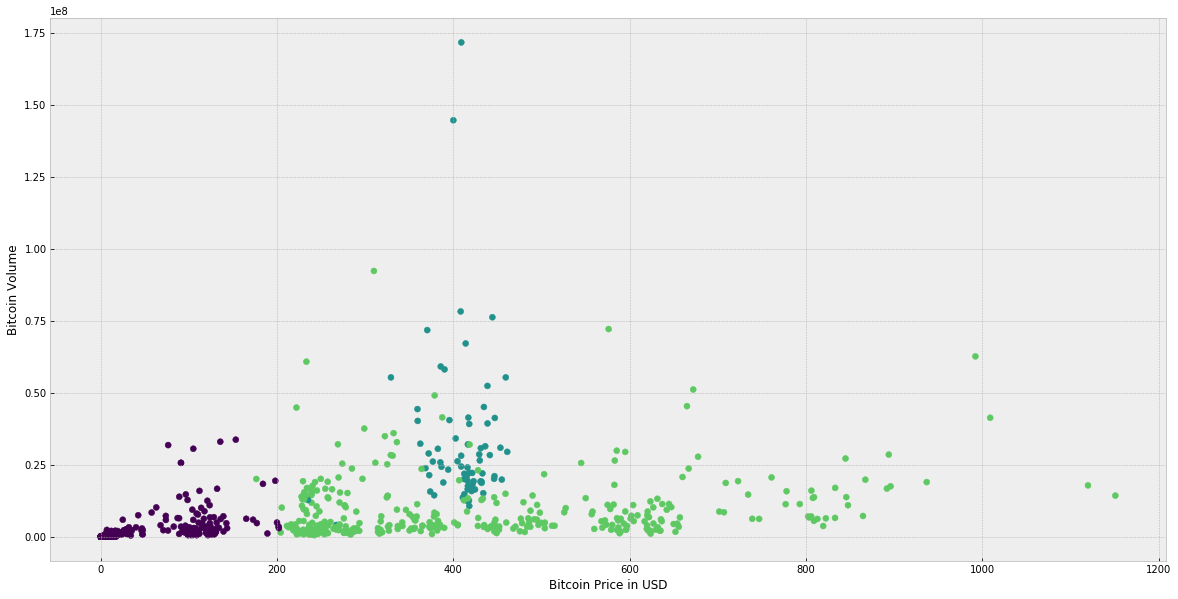

In [132]:
plt.scatter(combined['Value_MKPRU'][300:], combined['Value_TRVOU'][300:], c=labels[300:])
plt.xlabel('Bitcoin Price in USD')
plt.ylabel('Bitcoin Volume')
plt.show()

In [133]:
results = combined.copy()
results['cluster_id'] = labels
results.head()

,Value_AVBLS,Value_CPTRA,Value_MKPRU,Value_MWNUS,Value_NADDU,Value_NTRAN,Value_NTRAT,Value_NTRBL,Value_TRVOU,BTC_per_txn,cluster_id
2017-12-27,1.05,161.68,15999.04,21272882.0,605853.0,247440.0,286214316.0,1742.53,1.745062e+09,1.217022,2
2017-12-25,1.06,138.78,13949.17,21204476.0,652209.0,279523.0,285737950.0,1838.96,1.798168e+09,0.638425,2
2017-12-23,1.06,137.02,15190.94,21100453.0,890731.0,380648.0,285150216.0,2455.79,5.352016e+09,0.421652,2
2017-12-21,1.07,113.03,16026.27,20979889.0,853863.0,370277.0,284434086.0,2722.62,2.752776e+09,0.616003,2
2017-12-19,1.04,137.66,18961.85,20822024.0,922523.0,394239.0,283685187.0,2166.14,2.021141e+09,0.539337,2


In [134]:
'''

fig, ax = plt.subplots()


def plot_func(group):
    global ax
    if (combined['cluster_id'] == 0).all():
        color = 'r'
    elif (combined['cluster_id'] == 1).all():
        color = 'b'
    elif (combined['cluster_id'] == 2).all():
        color = 'g'
    else:
        color = 'y'
    lw = 2.0
    ax.plot(group.index, group, c=color, linewidth=lw)
    
    
plot_func(combined['daily_close_price'])

'''

"\n\nfig, ax = plt.subplots()\n\n\ndef plot_func(group):\n    global ax\n    if (combined['cluster_id'] == 0).all():\n        color = 'r'\n    elif (combined['cluster_id'] == 1).all():\n        color = 'b'\n    elif (combined['cluster_id'] == 2).all():\n        color = 'g'\n    else:\n        color = 'y'\n    lw = 2.0\n    ax.plot(group.index, group, c=color, linewidth=lw)\n    \n    \nplot_func(combined['daily_close_price'])\n\n"

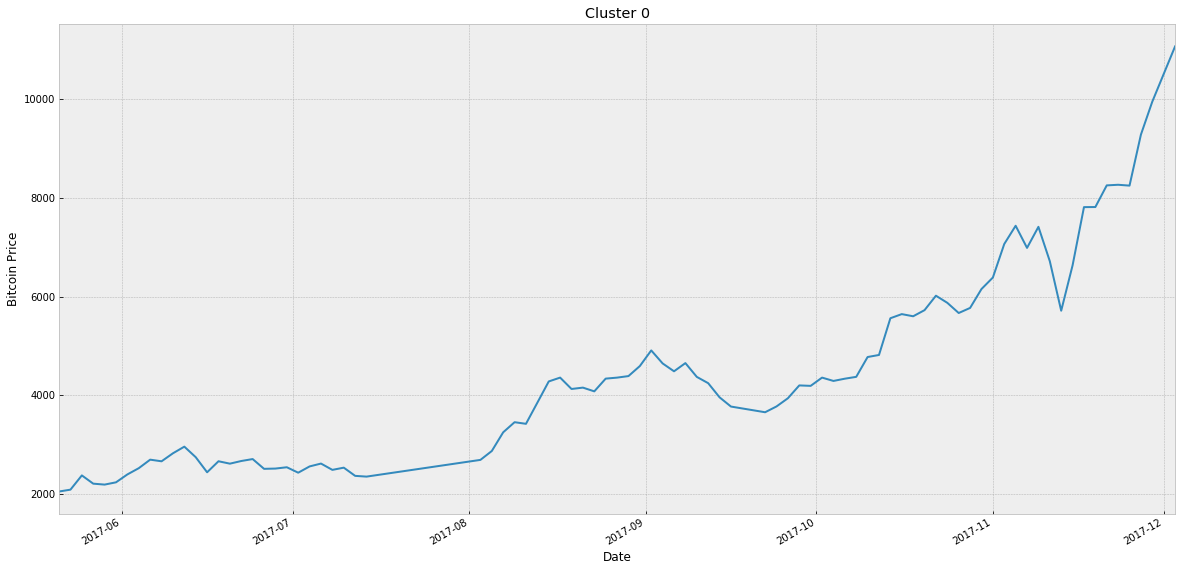

In [148]:
results['Value_MKPRU'].loc[results.cluster_id == 0].plot()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Cluster 0')
plt.show()

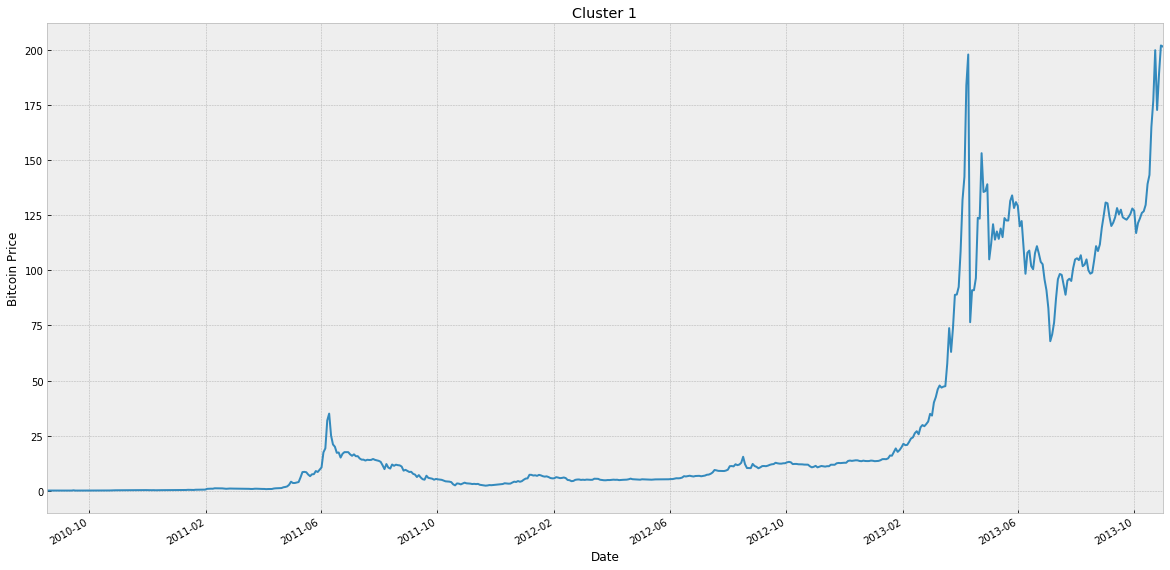

In [149]:
results['Value_MKPRU'].loc[results.cluster_id == 1].plot()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Cluster 1')
plt.show()

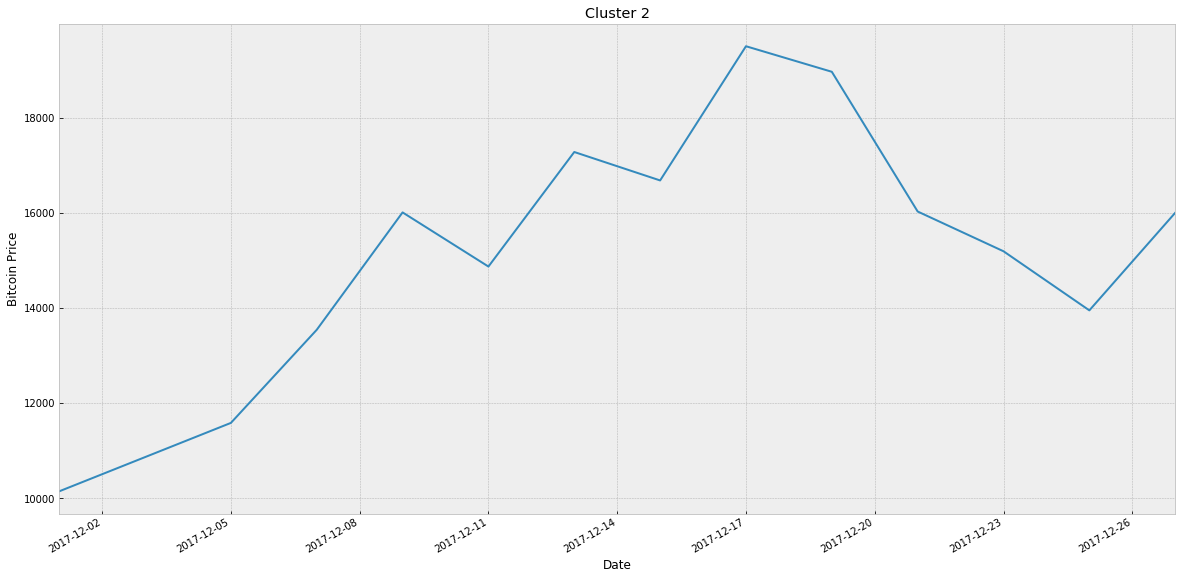

In [150]:
results['Value_MKPRU'].loc[results.cluster_id == 2].plot()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Cluster 2')
plt.show()

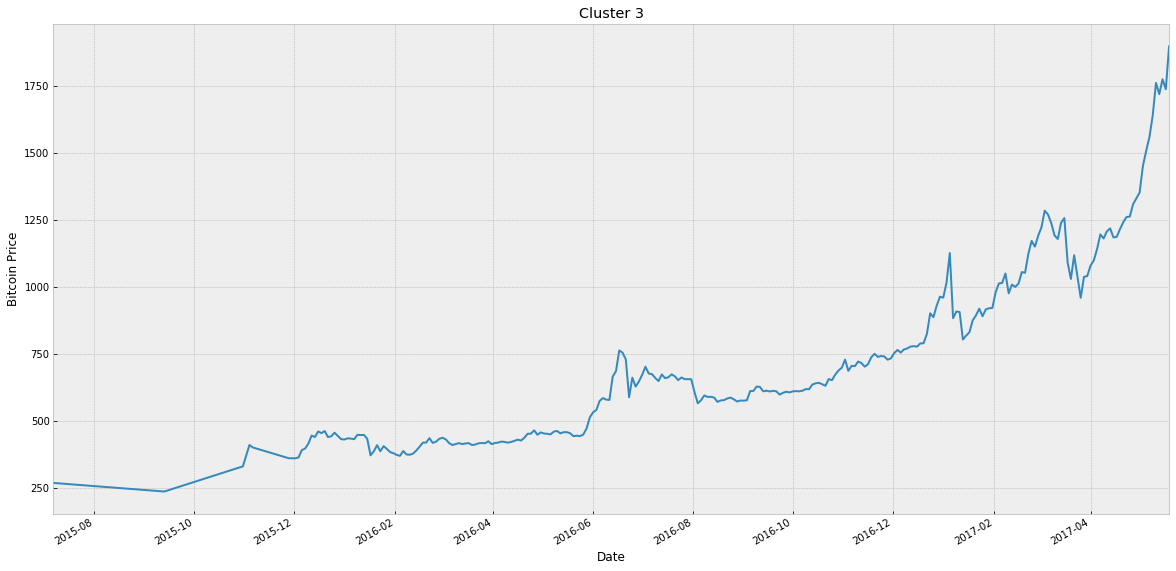

In [151]:
results['Value_MKPRU'].loc[results.cluster_id == 3].plot()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Cluster 3')
plt.show()

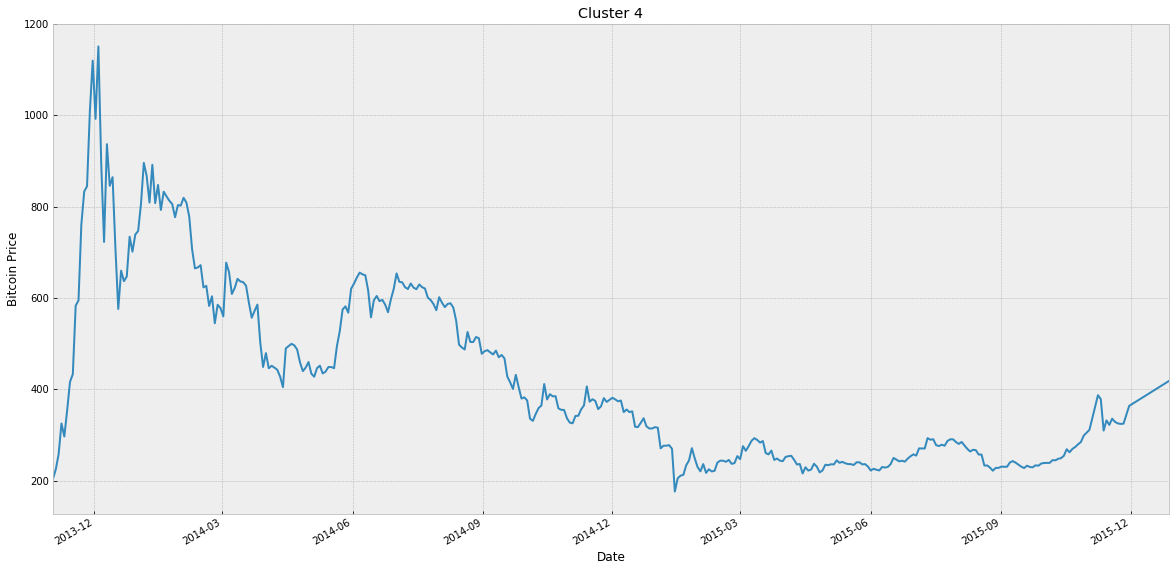

In [152]:
results['Value_MKPRU'].loc[results.cluster_id == 4].plot()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Cluster 4')
plt.show()

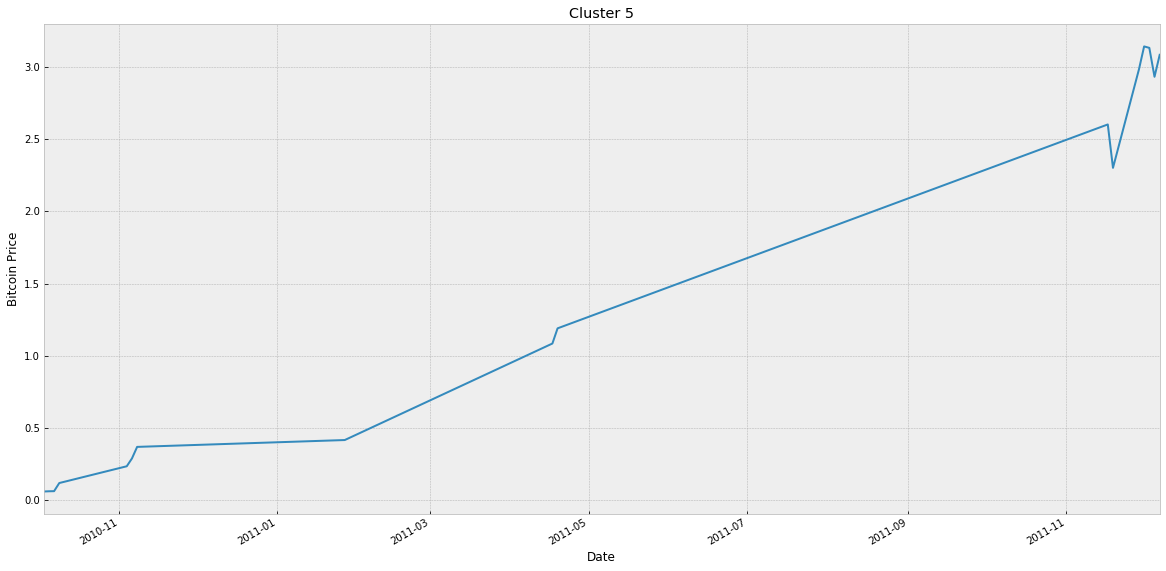

In [153]:
results['Value_MKPRU'].loc[results.cluster_id == 5].plot()
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Cluster 5')
plt.show()

What I am taking away from the above plots of each cluster is that Bitcoin has seen 4 distinct phases (perhaps Bitcoin lifecycle)

Cluster 0 is the last half of 2017 (*except for December*), the precursor to this year's rally.  Perhaps when the hype machine begins...

Cluster 1 is early-stage Bitcoin from 2010 to mid-2015 where the market was still nascent.

Cluster 2 is soley December 2017 when the hype machine reached a fever pitch and irrational exuberance takes hold. 

Cluster 3 is the back half of 2015 through mid-2017 which could be the "normal" growth/adoption phase.

Cluster 4 is the fallout from when Silk Road was shut down. 

Cluster 5 covers the early moments in Bitcoin's life and covers a subset of time in cluster 1. Likely transactions spurred by the early emergence of other coins.

In [141]:
x_test = np.array([[1.10, 78.59, 6838.82, 22872046, 486553, 216363,
                    297767307, 1169.53, 1793319477.25, 1.211974]]) #sample of data from 2/6/18


pipeline.predict(x_test)

array([2])

According to the model, Bitcoin remains in "bubble" territory despite the huge correction.

Let's attempt to employ dimensional reduction on the data and run it through the KMeans model (again looking for the optimal amount of clusters)

In [142]:
from sklearn.decomposition import PCA 

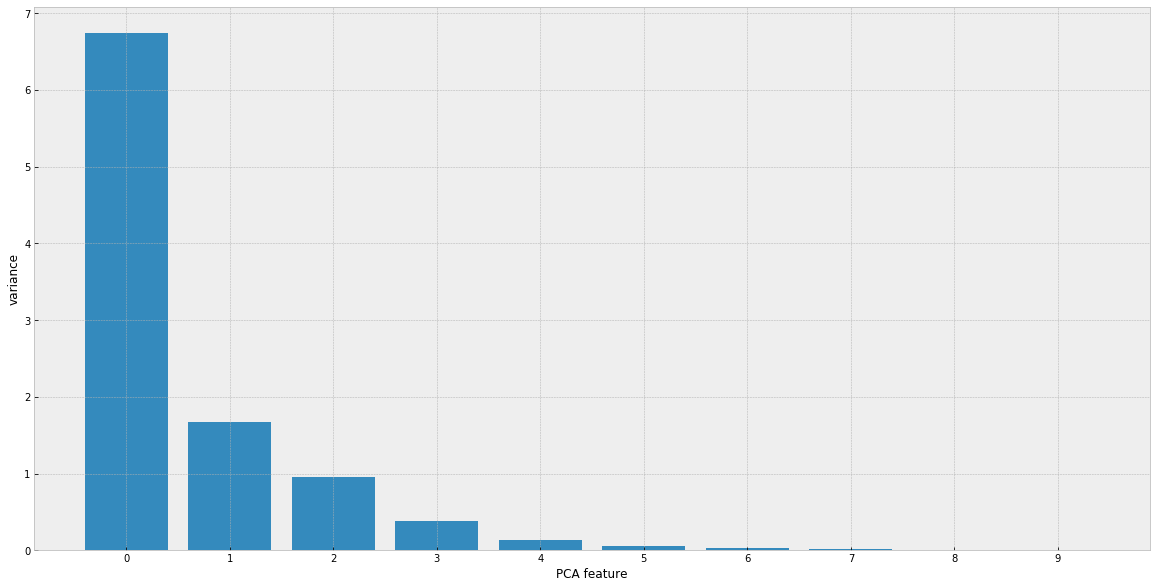

In [143]:
# employing PCA on scaled data x_scaled

pca = PCA()
pca_features = pca.fit_transform(x_scaled)

# plotting features

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


Per the above plot, components 0 and 1 explain most of the variance.  Thus, for our working model we will specify n_components as 2

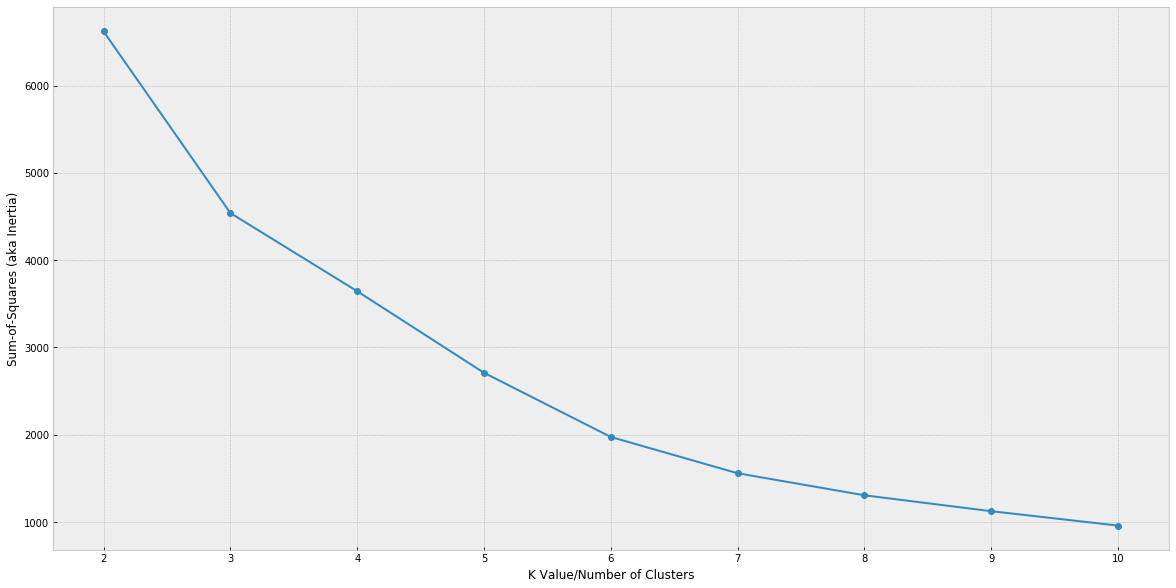

In [144]:
SS_2 = []

for i in K_range:
    km = KMeans(n_clusters=i, random_state=state)
    km.fit(pca_features)
    SS_2.append(km.inertia_)
    
plt.plot(K_range, SS_2, '-o')
plt.xlabel('K Value/Number of Clusters')
plt.ylabel('Sum-of-Squares (aka Inertia)')
plt.xticks(K_range)

plt.show()

It seems even with fitting the the pca_components (vs the scaled data), we should still choose 6 as the number of clusters (K) for our model.  

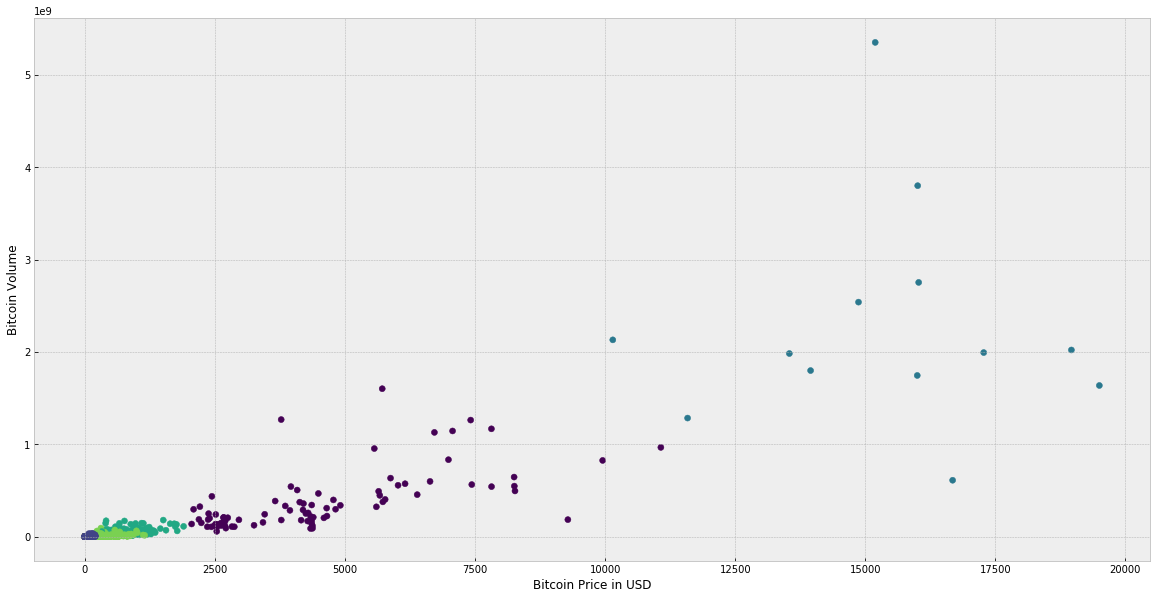

In [145]:
km = KMeans(n_clusters=6, random_state=state)

km.fit(pca_features)

labels2 = km.labels_

plt.scatter(combined['Value_MKPRU'], combined['Value_TRVOU'], c=labels2)
plt.xlabel('Bitcoin Price in USD')
plt.ylabel('Bitcoin Volume')
plt.show()

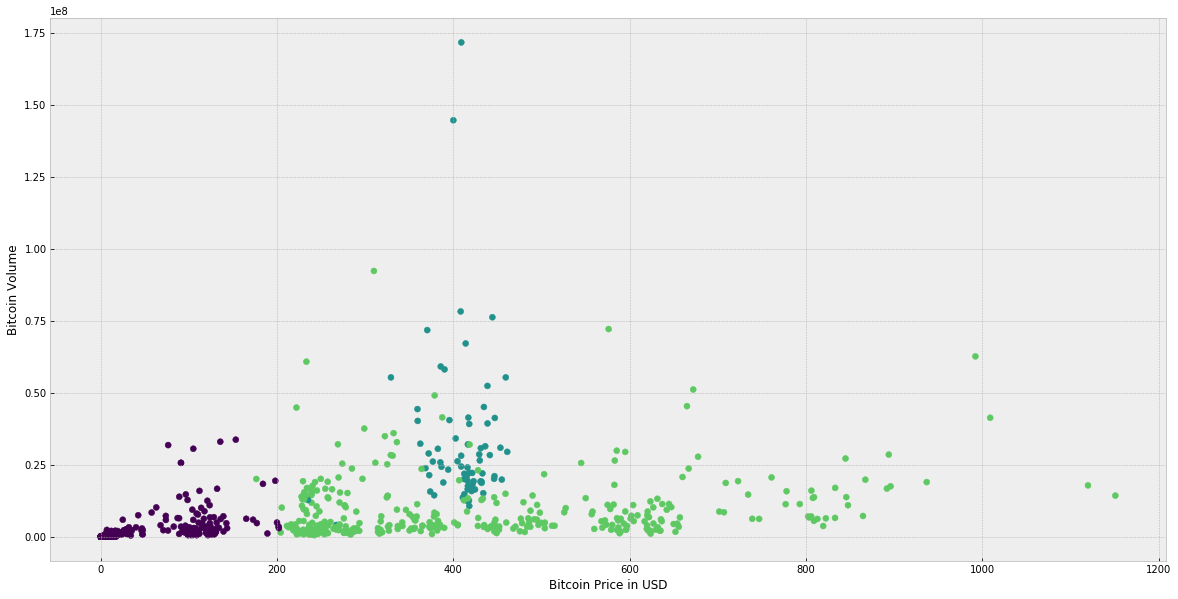

In [146]:
plt.scatter(combined['Value_MKPRU'][300:], combined['Value_TRVOU'][300:], c=labels[300:])
plt.xlabel('Bitcoin Price in USD')
plt.ylabel('Bitcoin Volume')
plt.show()

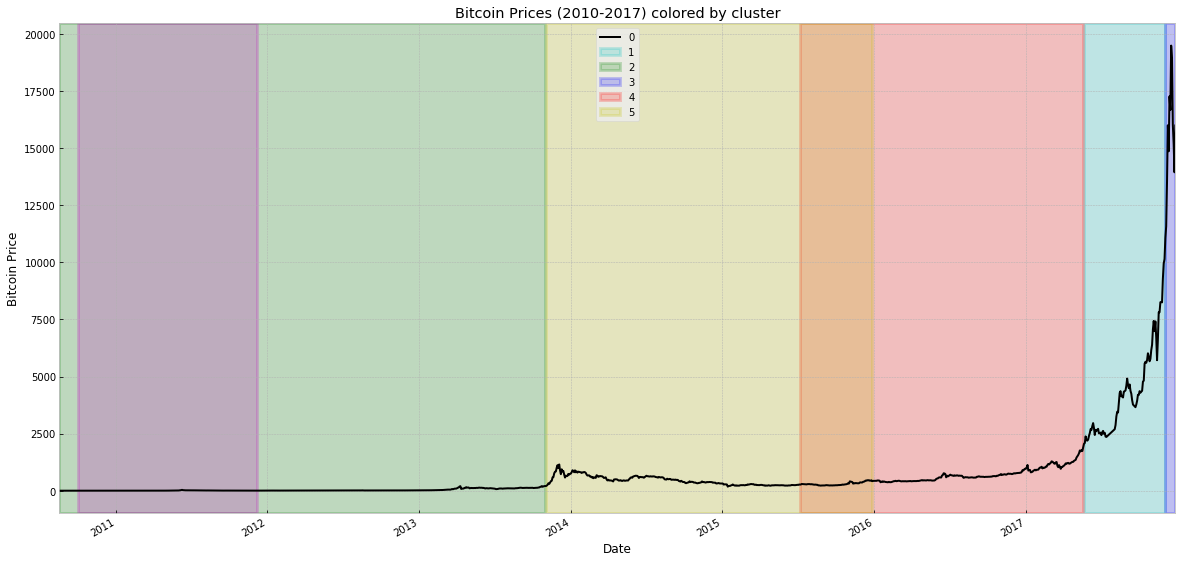

In [155]:
# shading of timeseries of BTC prices to identify clusters 

results_pca = combined.copy()
results_pca['cluster_id'] = labels2

a0 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 0].index[0]
b0 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 0].index[-1]

a1 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 1].index[0]
b1 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 1].index[-1]

a2 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 2].index[0]
b2 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 2].index[-1]

b3 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 3].index[0]
a3 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 3].index[-1]

b4 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 4].index[0]
a4 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 4].index[-1]

a5 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 5].index[0]
b5 = results_pca['Value_MKPRU'][results_pca['cluster_id'] == 5].index[-1]

plt.axvspan(a0, b0, color='c', alpha=0.2, lw=3) #cyan
plt.axvspan(a1, b1, color='g', alpha=0.2, lw=3) #green
plt.axvspan(a2, b2, color='b', alpha=0.2, lw=3) #blue
plt.axvspan(a3, b3, color='r', alpha=0.2, lw=3) #red
plt.axvspan(a4, b4, color='y', alpha=0.2, lw=3) #yellow
plt.axvspan(a5, b5, color='m', alpha=0.2, lw=3) #magenta

results_pca['Value_MKPRU'].plot(color='black')

plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Prices (2010-2017) colored by cluster')
plt.legend(np.sort(results_pca['cluster_id'].unique()))

plt.show()
